## Imports

In [70]:
import cv2
import numpy as np
from IPython.display import Image

## Load weights and configuration

In [53]:
# Load Yolo
net = cv2.dnn.readNet("standard/yolov3.weights", "standard/yolov3.cfg")
classes = []
with open("standard/coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()] # name of all the classes in the dataset
layer_names = net.getLayerNames() # all the layers in the yolov3
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()] # the three output layers of yolov3
colors = np.random.uniform(0, 255, size=(len(classes), 3))

## Load an image

In [54]:
# Loading image to be tested
img = cv2.imread('standard/test.jpg')
img = cv2.resize(img, None, fx=0.2, fy=0.2)
height, width, channels = img.shape

## Feeding image to network 

In [55]:
# Detecting objects
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob)
outs = net.forward(output_layers)

In [56]:
# Showing informations on the screen
class_ids = []
confidences = []
boxes = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

## Apply Non-Maximum Suppression

To remove multiple bounding boxes for the same object and keep one.

In [57]:
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

## Result

In [58]:
font = cv2.FONT_HERSHEY_COMPLEX_SMALL
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        color = colors[i]
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
        cv2.putText(img, label, (x, y + 30), font, 1, color, 1)
cv2.imwrite('standard/yolov3_pred.jpg', img)

True

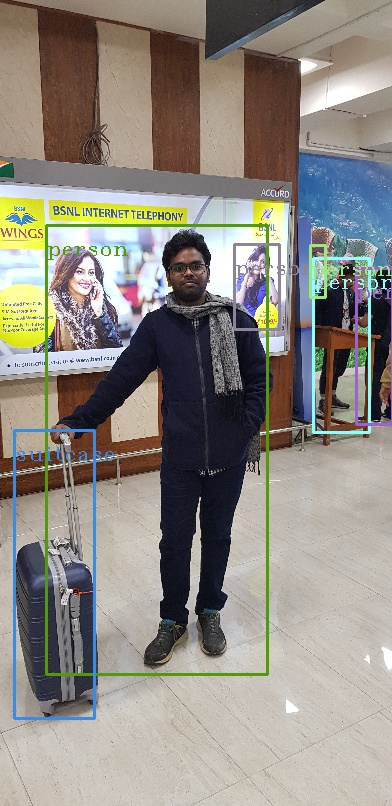

In [74]:
Image("standard/yolov3_pred.jpg")